## 5. Modeling - Camera Accessory
### 1. Linear Model

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.float_format', '{:0.3f}'.format)

In [2]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
ca_week = pd.read_csv('ca_week.csv', index_col = 0)
ca_week.head()

,week,gmv,listing_price,product_mrp,discount,sla,product_procurement_sla,fsn_id,order_payment_type,premium_product,...,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday,lag_1_NPS,lag_2_NPS,lag_3_NPS
0,1,11151.000,428.885,1121.038,0.491,2.423,2.731,20,26,0,...,1177.000,0.000,0.286,0.000,0.000,0.143,0.000,54.600,54.600,54.600
1,2,1228580.000,501.230,1013.379,0.448,7.253,2.578,540,753,0,...,1185.286,0.286,0.000,0.000,0.143,0.000,0.143,54.600,54.600,56.139
2,3,1344416.000,512.763,1096.768,0.458,6.567,2.577,538,823,0,...,1206.000,0.000,0.000,0.000,0.000,0.143,0.000,54.600,56.139,59.987
3,4,1346986.000,511.973,1086.319,0.445,6.611,2.613,529,781,0,...,1206.000,0.000,0.000,0.286,0.143,0.000,0.143,56.139,59.987,59.987
4,5,913445.000,522.839,1085.847,0.443,6.533,2.614,442,470,0,...,1206.000,0.000,0.286,0.429,0.000,0.143,0.000,59.987,59.987,59.987


In [4]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [5]:
camera_lm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']]
                            
    
camera_lm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA4_listed_price,MA2_discount_offer,premium_product
0,11151.000,0.491,2.423,2.731,26,100.000,0.054,1.854,0.000,0.332,...,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000,0
1,1228580.000,0.448,7.253,2.578,753,31.506,0.081,2.780,0.000,0.498,...,0.000,0.000,1.059,2.322,4.155,0.029,0.041,0.078,-0.046,0
2,1344416.000,0.458,6.567,2.577,823,32.023,0.081,2.780,0.000,0.498,...,0.286,0.143,0.816,4.722,1.569,0.029,0.041,0.066,0.011,0
3,1346986.000,0.445,6.611,2.613,781,30.377,0.081,2.780,0.000,0.498,...,0.000,0.000,1.632,4.172,1.141,0.029,0.041,0.048,-0.014,0
4,913445.000,0.443,6.533,2.614,470,27.598,0.028,1.139,0.000,0.192,...,0.000,0.143,0.816,5.908,4.341,0.029,0.041,0.021,-0.002,0


In [6]:
### Checking NaN

camera_lm.isnull().sum()

gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
order_payment_type          0
online_order_perc           0
TV_ads                     18
Sponsorship_ads            18
Content_marketing_ads      18
Online_marketing_ads       18
NPS                         0
Stock_Index                 0
Special_sales               0
Payday                      0
heat_deg_days               0
cool_deg_days               0
total_rain_mm               0
total_snow_cm               0
snow_on_grnd_cm             0
MA4_listed_price            0
MA2_discount_offer          0
premium_product             0
dtype: int64

In [7]:
camera_lm.fillna(0, inplace = True)

In [8]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(camera_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

In [9]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']
                                      

### Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [10]:
df_train.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA4_listed_price,MA2_discount_offer,premium_product
40,0.398,0.689,0.359,0.608,0.805,0.979,0.000,0.000,0.000,0.000,...,0.000,1.000,0.560,0.000,0.009,0.020,0.009,0.285,0.761,0.000
44,0.511,0.892,0.335,0.551,0.214,0.023,0.000,0.000,0.000,0.000,...,0.000,1.000,0.393,0.060,0.312,0.039,0.018,0.266,0.734,0.000
37,0.446,0.447,0.360,0.607,0.284,0.167,0.000,0.000,0.000,0.000,...,0.000,0.000,0.815,0.000,1.000,0.020,0.009,0.338,0.651,0.000
17,0.526,0.370,0.489,0.894,0.168,0.011,0.549,0.134,0.039,0.642,...,0.667,0.000,0.317,0.000,0.142,0.020,0.009,0.377,0.833,0.000
7,0.000,0.196,1.000,0.000,0.000,1.000,0.001,0.010,0.000,0.004,...,1.000,0.000,0.296,0.317,0.129,0.079,0.036,0.004,0.000,0.000


In [11]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
X_train = df_train.drop('gmv',axis=1)
y_train = df_train['gmv']

In [12]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [14]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('order_payment_type', True, 1),
 ('online_order_perc', True, 1),
 ('TV_ads', True, 1),
 ('Sponsorship_ads', False, 10),
 ('Content_marketing_ads', False, 5),
 ('Online_marketing_ads', True, 1),
 ('NPS', False, 4),
 ('Stock_Index', False, 9),
 ('Special_sales', True, 1),
 ('Payday', False, 11),
 ('heat_deg_days', True, 1),
 ('cool_deg_days', False, 8),
 ('total_rain_mm', False, 7),
 ('total_snow_cm', False, 6),
 ('snow_on_grnd_cm', False, 3),
 ('MA4_listed_price', False, 2),
 ('MA2_discount_offer', True, 1),
 ('premium_product', False, 12)]

In [15]:
X_train.columns[rfe.support_]

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Online_marketing_ads', 'Special_sales',
       'heat_deg_days', 'MA2_discount_offer'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [16]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Online_marketing_ads,Special_sales,heat_deg_days,MA2_discount_offer
40,0.689,0.359,0.608,0.805,0.979,0.000,0.000,0.000,0.560,0.761
44,0.892,0.335,0.551,0.214,0.023,0.000,0.000,0.000,0.393,0.734
37,0.447,0.360,0.607,0.284,0.167,0.000,0.000,0.000,0.815,0.651
17,0.370,0.489,0.894,0.168,0.011,0.549,0.642,0.667,0.317,0.833
7,0.196,1.000,0.000,0.000,1.000,0.001,0.004,1.000,0.296,0.000


In [17]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### MODEL 1

In [18]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     28.34
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           3.50e-11
Time:                        09:44:38   Log-Likelihood:                 60.257
No. Observations:                  36   AIC:                            -98.51
Df Residuals:                      25   BIC:                            -81.10
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [19]:
checkVIF(X_train_new)

,Features,VIF
0,const,266.290
7,Online_marketing_ads,67.570
6,TV_ads,58.010
3,product_procurement_sla,10.680
1,discount,9.010
4,order_payment_type,5.510
10,MA2_discount_offer,5.280
5,online_order_perc,4.630
2,sla,3.800
9,heat_deg_days,2.300


In [20]:
X_train_new = X_train_rfe.drop(["discount"], axis = 1)

### MODEL 2

In [21]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     19.09
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.62e-09
Time:                        09:44:38   Log-Likelihood:                 51.556
No. Observations:                  36   AIC:                            -83.11
Df Residuals:                      26   BIC:                            -67.28
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [22]:
checkVIF(X_train_new)

,Features,VIF
0,const,97.460
6,Online_marketing_ads,67.480
5,TV_ads,57.770
9,MA2_discount_offer,3.830
2,product_procurement_sla,3.450
3,order_payment_type,3.360
4,online_order_perc,2.990
1,sla,2.090
8,heat_deg_days,2.080
7,Special_sales,1.390


In [23]:
X_train_new = X_train_new.drop(["heat_deg_days"], axis = 1)

### MODEL 3

In [24]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           8.60e-10
Time:                        09:44:38   Log-Likelihood:                 50.890
No. Observations:                  36   AIC:                            -83.78
Df Residuals:                      27   BIC:                            -69.53
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### MODEL 4

In [25]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     21.37
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           8.60e-10
Time:                        09:44:38   Log-Likelihood:                 50.890
No. Observations:                  36   AIC:                            -83.78
Df Residuals:                      27   BIC:                            -69.53
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [26]:
checkVIF(X_train_new)

,Features,VIF
0,const,81.840
6,Online_marketing_ads,44.980
5,TV_ads,42.820
8,MA2_discount_offer,3.830
4,online_order_perc,2.960
2,product_procurement_sla,2.920
3,order_payment_type,2.820
1,sla,2.060
7,Special_sales,1.200


In [27]:
X_train_new = X_train_new.drop(["sla"], axis = 1)

### MODEL 5

In [28]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     25.07
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.83e-10
Time:                        09:44:38   Log-Likelihood:                 50.733
No. Observations:                  36   AIC:                            -85.47
Df Residuals:                      28   BIC:                            -72.80
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [29]:
checkVIF(X_train_new)

,Features,VIF
0,const,43.050
5,Online_marketing_ads,42.780
4,TV_ads,41.210
3,online_order_perc,2.930
2,order_payment_type,2.800
1,product_procurement_sla,2.500
7,MA2_discount_offer,2.360
6,Special_sales,1.150


In [30]:
X_train_new = X_train_new.drop(["MA2_discount_offer"], axis = 1)

### MODEL 6

In [31]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     30.03
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           3.50e-11
Time:                        09:44:38   Log-Likelihood:                 50.598
No. Observations:                  36   AIC:                            -87.20
Df Residuals:                      29   BIC:                            -76.11
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [32]:
checkVIF(X_train_new)

,Features,VIF
5,Online_marketing_ads,41.590
4,TV_ads,39.680
0,const,32.230
3,online_order_perc,2.340
1,product_procurement_sla,2.030
2,order_payment_type,1.880
6,Special_sales,1.140


In [33]:
X_train_new = X_train_new.drop(["product_procurement_sla"], axis = 1)

### MODEL 7

In [34]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     36.40
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           7.26e-12
Time:                        09:44:38   Log-Likelihood:                 50.231
No. Observations:                  36   AIC:                            -88.46
Df Residuals:                      30   BIC:                            -78.96
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2796 

In [35]:
checkVIF(X_train_new)

,Features,VIF
4,Online_marketing_ads,40.950
3,TV_ads,39.670
0,const,4.440
2,online_order_perc,1.830
1,order_payment_type,1.650
5,Special_sales,1.090


In [36]:
# X_train_new = X_train_new.drop(["MA4_listed_price"], axis = 1)

### MODEL 8

In [37]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     36.40
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           7.26e-12
Time:                        09:44:38   Log-Likelihood:                 50.231
No. Observations:                  36   AIC:                            -88.46
Df Residuals:                      30   BIC:                            -78.96
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2796 

In [38]:
checkVIF(X_train_new)

,Features,VIF
4,Online_marketing_ads,40.950
3,TV_ads,39.670
0,const,4.440
2,online_order_perc,1.830
1,order_payment_type,1.650
5,Special_sales,1.090


### Residual Analysis of Model

In [39]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

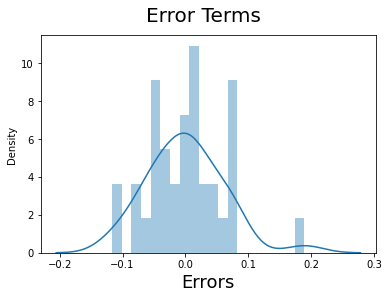

In [40]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Prediction and Evaluation

In [41]:
#Scaling the test set
num_vars = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','premium_product']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [42]:
#Dividing into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [43]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [44]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Evaluation of test via comparison of y_pred and y_test

In [45]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.33255713336933834

Text(0, 0.5, 'y_pred')

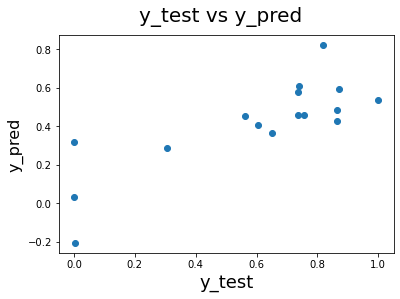

In [46]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

### Evaluation of the model using Statistics

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     36.40
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           7.26e-12
Time:                        09:44:39   Log-Likelihood:                 50.231
No. Observations:                  36   AIC:                            -88.46
Df Residuals:                      30   BIC:                            -78.96
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2796 

### 1.1 Linear Model - Stepwise Selection for feature selection

In [48]:
###  Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [50]:
camera_lm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']]
                            
    
camera_lm.head()


,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA4_listed_price,MA2_discount_offer
0,11151.000,0.491,2.423,2.731,26,100.000,0.054,1.854,0.000,0.332,...,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000
1,1228580.000,0.448,7.253,2.578,753,31.506,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.041,0.078,-0.046
2,1344416.000,0.458,6.567,2.577,823,32.023,0.081,2.780,0.000,0.498,...,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.041,0.066,0.011
3,1346986.000,0.445,6.611,2.613,781,30.377,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.041,0.048,-0.014
4,913445.000,0.443,6.533,2.614,470,27.598,0.028,1.139,0.000,0.192,...,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.041,0.021,-0.002


In [51]:
### Checking NaN
camera_lm.isnull().sum()

gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
order_payment_type          0
online_order_perc           0
TV_ads                     18
Sponsorship_ads            18
Content_marketing_ads      18
Online_marketing_ads       18
NPS                         0
Stock_Index                 0
Special_sales               0
Payday                      0
heat_deg_days               0
cool_deg_days               0
total_rain_mm               0
total_snow_cm               0
snow_on_grnd_cm             0
MA4_listed_price            0
MA2_discount_offer          0
dtype: int64

In [52]:
camera_lm.fillna(0, inplace = True)

In [53]:
### Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']
                                      

### Scale these variables using 'fit_transform'
camera_lm[varlist] = scaler.fit_transform(camera_lm[varlist])

In [54]:
camera_lm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA4_listed_price,MA2_discount_offer
0,0.003,0.391,0.000,0.577,0.006,1.000,0.023,0.058,0.000,0.036,...,0.714,0.000,1.000,0.000,0.247,0.000,0.000,0.000,0.583,0.347
1,0.296,0.319,0.683,0.526,0.165,0.315,0.035,0.088,0.000,0.054,...,0.714,0.000,0.000,0.069,0.393,0.420,0.019,0.009,0.689,0.292
2,0.324,0.335,0.586,0.526,0.180,0.320,0.035,0.088,0.000,0.054,...,0.714,0.286,0.714,0.051,0.799,0.159,0.019,0.009,0.674,0.360
3,0.325,0.314,0.592,0.538,0.171,0.304,0.035,0.088,0.000,0.054,...,0.714,0.000,0.000,0.109,0.706,0.115,0.019,0.009,0.648,0.330
4,0.220,0.311,0.581,0.538,0.103,0.276,0.012,0.036,0.000,0.021,...,0.750,0.000,0.714,0.051,1.000,0.439,0.019,0.009,0.611,0.345


In [55]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_lm.drop('gmv',axis=1)
y = camera_lm['gmv']

camera_train_lm = camera_lm

In [56]:
print("x dataset: ",x.shape)
print("y dataset: ",y.shape)

x dataset:  (52, 20)
y dataset:  (52,)


In [57]:
###  Instantiate
lm = LinearRegression()

###  Fit a line
lm.fit(x,y)

LinearRegression()

In [58]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

,0,Coefficient
0,discount,-0.080
1,sla,-0.003
2,product_procurement_sla,0.330
3,order_payment_type,0.784
4,online_order_perc,-0.397
5,TV_ads,-0.644
6,Sponsorship_ads,0.075
7,Content_marketing_ads,0.086
8,Online_marketing_ads,0.418
9,NPS,-0.338


In [59]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [60]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [61]:
def stepwise_selection(x, y,
                       initial_list=[ 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(x.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [62]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop sla                            with p-value 0.989553
Drop total_rain_mm                  with p-value 0.860479
Drop discount                       with p-value 0.789434
Drop snow_on_grnd_cm                with p-value 0.691511
Drop Payday                         with p-value 0.567039
Drop cool_deg_days                  with p-value 0.531391
Drop Stock_Index                    with p-value 0.562242
Drop total_snow_cm                  with p-value 0.450084
Drop Sponsorship_ads                with p-value 0.403867
Drop Content_marketing_ads          with p-value 0.120234
Drop Special_sales                  with p-value 0.104288

 final_selected_features: ['product_procurement_sla', 'order_payment_type', 'online_order_perc', 'TV_ads', 'Online_marketing_ads', 'NPS', 'heat_deg_days', 'MA4_listed_price', 'MA2_discount_offer']


In [63]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
lm1 = sm.OLS(y, x_rfe1).fit() 

print(lm1.params)

const                      0.916
product_procurement_sla    0.370
order_payment_type         0.801
online_order_perc         -0.402
TV_ads                    -0.454
Online_marketing_ads       0.374
NPS                       -0.327
heat_deg_days             -0.150
MA4_listed_price          -0.679
MA2_discount_offer        -0.515
dtype: float64


In [64]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     29.21
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.65e-15
Time:                        09:44:39   Log-Likelihood:                 68.657
No. Observations:                  52   AIC:                            -117.3
Df Residuals:                      42   BIC:                            -97.80
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [65]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,155.370
4,TV_ads,28.970
5,Online_marketing_ads,27.510
8,MA4_listed_price,4.450
6,NPS,3.420
1,product_procurement_sla,3.020
9,MA2_discount_offer,2.810
3,online_order_perc,2.760
2,order_payment_type,2.400
7,heat_deg_days,2.210


In [66]:
features = list(x_rfe1.columns)
features.remove('const')
features

['product_procurement_sla',
 'order_payment_type',
 'online_order_perc',
 'TV_ads',
 'Online_marketing_ads',
 'NPS',
 'heat_deg_days',
 'MA4_listed_price',
 'MA2_discount_offer']

In [67]:
###  Model Evaluation on testing data
x_2 = x[features]


###  Predicition with selected features on the test data
y_pred = lm1.predict(sm.add_constant(x_2))

In [68]:
###  Mean square error (MSE)

mse = np.mean((y_pred - y)**2)
mse

0.004175539076007663

In [69]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(lm.coef_)
coef

,0,Coefficient
0,const,-0.080
1,product_procurement_sla,-0.003
2,order_payment_type,0.330
3,online_order_perc,0.784
4,TV_ads,-0.397
5,Online_marketing_ads,-0.644
6,NPS,0.075
7,heat_deg_days,0.086
8,MA4_listed_price,0.418
9,MA2_discount_offer,-0.338


In [70]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(lm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.02886697 0.00442846 0.0107104  0.05641079 0.00396771 0.00070539
 0.00956316 0.03021141 0.00441556 0.00236012] 

Mean of 5 KFold CV - MSE: 0.015163997017685556


In [71]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#    features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

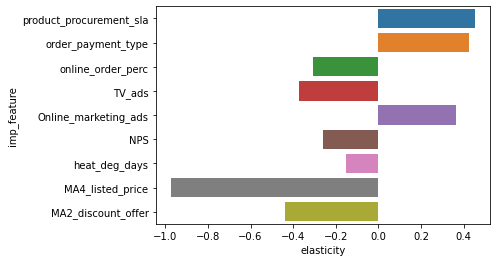

,imp_feature,coef,elasticity
0,product_procurement_sla,0.370,0.454
1,order_payment_type,0.801,0.424
2,online_order_perc,-0.402,-0.305
3,TV_ads,-0.454,-0.373
4,Online_marketing_ads,0.374,0.364
5,NPS,-0.327,-0.258
6,heat_deg_days,-0.150,-0.150
7,MA4_listed_price,-0.679,-0.974
8,MA2_discount_offer,-0.515,-0.440


In [72]:
elasticity(lm1,camera_train_lm)

Text(0, 0.5, 'y_pred')

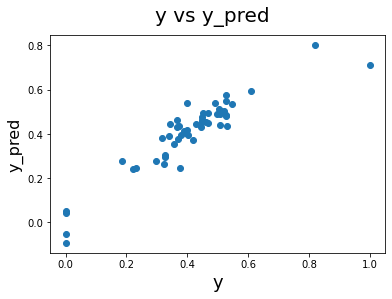

In [73]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

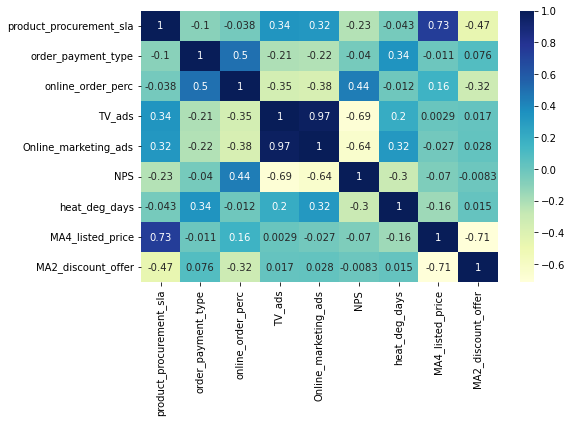

In [74]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_lm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### 2. Multiplicative Model

In [75]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [76]:
camera_mm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']]         

camera_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA4_listed_price,MA2_discount_offer
0,11151.000,0.491,2.423,2.731,26,100.000,0.054,1.854,0.000,0.332,...,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000
1,1228580.000,0.448,7.253,2.578,753,31.506,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.041,0.078,-0.046
2,1344416.000,0.458,6.567,2.577,823,32.023,0.081,2.780,0.000,0.498,...,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.041,0.066,0.011
3,1346986.000,0.445,6.611,2.613,781,30.377,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.041,0.048,-0.014
4,913445.000,0.443,6.533,2.614,470,27.598,0.028,1.139,0.000,0.192,...,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.041,0.021,-0.002


In [77]:
### Applying Log 
camera_mm=np.log(camera_mm)

camera_mm = camera_mm.fillna(0)
camera_mm = camera_mm.replace([np.inf, -np.inf], 0)

In [78]:
camera_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA4_listed_price,MA2_discount_offer
0,9.319,-0.712,0.885,1.005,3.258,4.605,-2.922,0.617,-8.364,-1.103,...,7.071,0.000,-1.609,-2.303,0.378,0.000,0.000,0.000,0.000,0.000
1,14.021,-0.803,1.981,0.947,6.624,3.450,-2.516,1.023,-7.958,-0.698,...,7.071,0.000,0.000,0.057,0.842,1.424,-3.532,-3.189,-2.554,0.000
2,14.111,-0.782,1.882,0.947,6.713,3.466,-2.516,1.023,-7.958,-0.698,...,7.071,-1.253,-1.946,-0.203,1.552,0.451,-3.532,-3.189,-2.716,-4.550
3,14.113,-0.810,1.889,0.961,6.661,3.414,-2.516,1.023,-7.958,-0.698,...,7.071,0.000,0.000,0.490,1.428,0.131,-3.532,-3.189,-3.045,0.000
4,13.725,-0.813,1.877,0.961,6.153,3.318,-3.568,0.131,-9.046,-1.652,...,7.078,0.000,-1.946,-0.203,1.776,1.468,-3.532,-3.189,-3.874,0.000


In [79]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']      



### Scale these variables using 'fit_transform'
camera_mm[varlist] = scaler.fit_transform(camera_mm[varlist])

In [80]:
camera_mm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA4_listed_price,MA2_discount_offer
0,0.379,0.536,0.000,0.725,0.387,1.000,0.470,0.382,0.358,0.393,...,0.734,1.000,0.173,0.000,0.408,0.303,0.895,0.677,1.000,1.000
1,0.873,0.459,0.802,0.683,0.786,0.749,0.527,0.471,0.388,0.467,...,0.734,1.000,1.000,0.477,0.604,0.736,0.000,0.000,0.572,1.000
2,0.882,0.477,0.730,0.683,0.796,0.753,0.527,0.471,0.388,0.467,...,0.734,0.356,0.000,0.424,0.905,0.440,0.000,0.000,0.545,0.157
3,0.882,0.454,0.735,0.693,0.790,0.741,0.527,0.471,0.388,0.467,...,0.734,1.000,1.000,0.564,0.853,0.343,0.000,0.000,0.490,1.000
4,0.841,0.450,0.726,0.693,0.730,0.720,0.378,0.277,0.307,0.293,...,0.768,1.000,0.000,0.424,1.000,0.750,0.000,0.000,0.351,1.000


In [81]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split

x = camera_mm.drop('gmv',axis=1)
y = camera_mm['gmv']

camera_train_mm = camera_mm

In [82]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 20) (52,)


In [83]:
### Instantiate
mm = LinearRegression()

### Fit a line
mm.fit(x,y)

LinearRegression()

In [84]:
### Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

,0,Coefficient
0,discount,-0.330
1,sla,0.022
2,product_procurement_sla,0.015
3,order_payment_type,0.952
4,online_order_perc,-0.243
5,TV_ads,0.086
6,Sponsorship_ads,-0.044
7,Content_marketing_ads,-0.013
8,Online_marketing_ads,0.007
9,NPS,-0.120


In [85]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [86]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [87]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(x.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [88]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop Online_marketing_ads           with p-value 0.936922
Drop product_procurement_sla        with p-value 0.892365
Drop sla                            with p-value 0.867897
Drop Content_marketing_ads          with p-value 0.842751
Drop MA2_discount_offer             with p-value 0.754039
Drop snow_on_grnd_cm                with p-value 0.706963
Drop total_snow_cm                  with p-value 0.671724
Drop total_rain_mm                  with p-value 0.707199
Drop heat_deg_days                  with p-value 0.557129
Drop Special_sales                  with p-value 0.605921
Drop TV_ads                         with p-value 0.446743
Drop Payday                         with p-value 0.314834
Drop Stock_Index                    with p-value 0.10719
Drop MA4_listed_price               with p-value 0.272417
Drop Sponsorship_ads                with p-value 0.0544928
Drop cool_deg_days                  with p-value 0.0751183

 final_selected_features: ['discount', 'order_payment_type', 'online_o

In [89]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                 0.504
discount             -0.327
order_payment_type    1.003
online_order_perc    -0.271
NPS                  -0.092
dtype: float64


In [90]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     656.5
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.39e-40
Time:                        09:44:41   Log-Likelihood:                 113.99
No. Observations:                  52   AIC:                            -218.0
Df Residuals:                      47   BIC:                            -208.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5042      0

In [91]:
# x_rfe1.drop('TV_ads',1,inplace=True)
x_rfe1.drop('NPS',1,inplace=True)

x_rfe1 = sm.add_constant(x_rfe1)


### Fitting the model with selected variables
mm1 = sm.OLS(y, x_rfe1).fit() 

print(mm1.params)

const                 0.478
discount             -0.370
order_payment_type    1.088
online_order_perc    -0.336
dtype: float64


In [92]:
print(mm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     647.0
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           8.43e-39
Time:                        09:44:41   Log-Likelihood:                 105.76
No. Observations:                  52   AIC:                            -203.5
Df Residuals:                      48   BIC:                            -195.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4778      0

In [93]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.890
1,discount,1.360
3,online_order_perc,1.360
2,order_payment_type,1.180


In [94]:
features = list(x_rfe1.columns)
features.remove('const')
features

['discount', 'order_payment_type', 'online_order_perc']

In [95]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = mm1.predict(sm.add_constant(x_2))

In [96]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.0010022781384683998

In [97]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(mm.coef_)
coef

,0,Coefficient
0,const,-0.330
1,discount,0.022
2,order_payment_type,0.015
3,online_order_perc,0.952


In [98]:
### Mean Square Error 
###  Using K-Fold Cross validation evaluating on selected dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(mm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.03393283 0.00142998 0.00108867 0.00411044 0.00026866 0.00159597
 0.00025437 0.00092806 0.00031971 0.00139341] 

Mean of 5 KFold CV - MSE: 0.004532209001151361


In [99]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#     features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

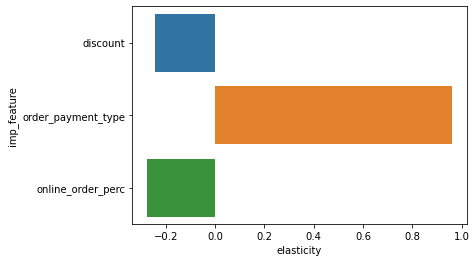

,imp_feature,coef,elasticity
0,discount,-0.370,-0.245
1,order_payment_type,1.088,0.960
2,online_order_perc,-0.336,-0.275


In [100]:
elasticity(mm1,camera_train_mm)

Text(0, 0.5, 'y_pred')

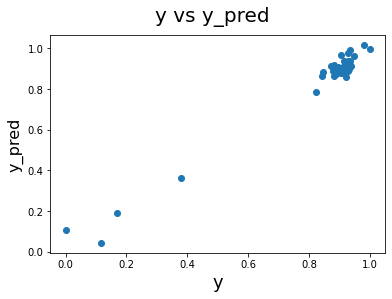

In [101]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

3. ### Kyock Model

In [102]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [103]:
camera_km = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer']]           


camera_km.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Stock_Index,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA4_listed_price,MA2_discount_offer
0,11151.000,0.491,2.423,2.731,26,100.000,0.054,1.854,0.000,0.332,...,1177.000,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000
1,1228580.000,0.448,7.253,2.578,753,31.506,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.059,2.322,4.155,0.029,0.041,0.078,-0.046
2,1344416.000,0.458,6.567,2.577,823,32.023,0.081,2.780,0.000,0.498,...,1177.000,0.286,0.143,0.816,4.722,1.569,0.029,0.041,0.066,0.011
3,1346986.000,0.445,6.611,2.613,781,30.377,0.081,2.780,0.000,0.498,...,1177.000,0.000,0.000,1.632,4.172,1.141,0.029,0.041,0.048,-0.014
4,913445.000,0.443,6.533,2.614,470,27.598,0.028,1.139,0.000,0.192,...,1185.286,0.000,0.143,0.816,5.908,4.341,0.029,0.041,0.021,-0.002


In [104]:
camera_km['lag_1_gmv'] = camera_km['gmv'].shift(-1)

In [105]:
### Checking NaN

camera_km.isnull().sum()

gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
order_payment_type          0
online_order_perc           0
TV_ads                     18
Sponsorship_ads            18
Content_marketing_ads      18
Online_marketing_ads       18
NPS                         0
Stock_Index                 0
Special_sales               0
Payday                      0
heat_deg_days               0
cool_deg_days               0
total_rain_mm               0
total_snow_cm               0
snow_on_grnd_cm             0
MA4_listed_price            0
MA2_discount_offer          0
lag_1_gmv                   1
dtype: int64

In [106]:
camera_km = camera_km.fillna(0)

In [107]:
camera_km.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA4_listed_price,MA2_discount_offer,lag_1_gmv
0,11151.000,0.491,2.423,2.731,26,100.000,0.054,1.854,0.000,0.332,...,0.000,0.200,0.100,1.460,0.000,0.000,0.000,0.000,0.000,1228580.000
1,1228580.000,0.448,7.253,2.578,753,31.506,0.081,2.780,0.000,0.498,...,0.000,0.000,1.059,2.322,4.155,0.029,0.041,0.078,-0.046,1344416.000
2,1344416.000,0.458,6.567,2.577,823,32.023,0.081,2.780,0.000,0.498,...,0.286,0.143,0.816,4.722,1.569,0.029,0.041,0.066,0.011,1346986.000
3,1346986.000,0.445,6.611,2.613,781,30.377,0.081,2.780,0.000,0.498,...,0.000,0.000,1.632,4.172,1.141,0.029,0.041,0.048,-0.014,913445.000
4,913445.000,0.443,6.533,2.614,470,27.598,0.028,1.139,0.000,0.192,...,0.000,0.143,0.816,5.908,4.341,0.029,0.041,0.021,-0.002,1498.000


In [108]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

### Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer','lag_1_gmv']

### Scale these variables using 'fit_transform'
camera_km[varlist] = scaler.fit_transform(camera_km[varlist])

In [109]:
camera_km.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,Special_sales,Payday,heat_deg_days,cool_deg_days,total_rain_mm,total_snow_cm,snow_on_grnd_cm,MA4_listed_price,MA2_discount_offer,lag_1_gmv
0,0.003,0.391,0.000,0.577,0.006,1.000,0.023,0.058,0.000,0.036,...,0.000,1.000,0.000,0.247,0.000,0.000,0.000,0.583,0.347,0.296
1,0.296,0.319,0.683,0.526,0.165,0.315,0.035,0.088,0.000,0.054,...,0.000,0.000,0.069,0.393,0.420,0.019,0.009,0.689,0.292,0.324
2,0.324,0.335,0.586,0.526,0.180,0.320,0.035,0.088,0.000,0.054,...,0.286,0.714,0.051,0.799,0.159,0.019,0.009,0.674,0.360,0.325
3,0.325,0.314,0.592,0.538,0.171,0.304,0.035,0.088,0.000,0.054,...,0.000,0.000,0.109,0.706,0.115,0.019,0.009,0.648,0.330,0.220
4,0.220,0.311,0.581,0.538,0.103,0.276,0.012,0.036,0.000,0.021,...,0.000,0.714,0.051,1.000,0.439,0.019,0.009,0.611,0.345,0.000


In [110]:
### Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_km.drop('gmv',axis=1)
y = camera_km['gmv']

camera_train_km = camera_km

In [111]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 21) (52,)


In [112]:
###  Instantiate
km = LinearRegression()

###  Fit a line
km.fit(x,y)

LinearRegression()

In [113]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

,0,Coefficient
0,discount,-0.090
1,sla,-0.006
2,product_procurement_sla,0.311
3,order_payment_type,0.787
4,online_order_perc,-0.396
5,TV_ads,-0.681
6,Sponsorship_ads,0.082
7,Content_marketing_ads,0.092
8,Online_marketing_ads,0.443
9,NPS,-0.355


In [114]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_gmv'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [115]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [116]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_gmv'],
                       threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(x.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [117]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop sla                            with p-value 0.97602
Drop total_rain_mm                  with p-value 0.858842
Drop discount                       with p-value 0.770294
Drop lag_1_gmv                      with p-value 0.676835
Drop snow_on_grnd_cm                with p-value 0.691511
Drop Payday                         with p-value 0.567039
Drop cool_deg_days                  with p-value 0.531391
Drop Stock_Index                    with p-value 0.562242
Drop total_snow_cm                  with p-value 0.450084
Drop Sponsorship_ads                with p-value 0.403867
Drop Content_marketing_ads          with p-value 0.120234
Drop Special_sales                  with p-value 0.104288

 final_selected_features: ['product_procurement_sla', 'order_payment_type', 'online_order_perc', 'TV_ads', 'Online_marketing_ads', 'NPS', 'heat_deg_days', 'MA4_listed_price', 'MA2_discount_offer']


In [118]:
### Import statsmodels
import statsmodels.api as sm  

### Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

### Fitting the model with selected variables
km1 = sm.OLS(y, x_rfe1).fit() 

print(km1.params)

const                      0.916
product_procurement_sla    0.370
order_payment_type         0.801
online_order_perc         -0.402
TV_ads                    -0.454
Online_marketing_ads       0.374
NPS                       -0.327
heat_deg_days             -0.150
MA4_listed_price          -0.679
MA2_discount_offer        -0.515
dtype: float64


In [119]:
print(km1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     29.21
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.65e-15
Time:                        09:44:43   Log-Likelihood:                 68.657
No. Observations:                  52   AIC:                            -117.3
Df Residuals:                      42   BIC:                            -97.80
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [120]:
### Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,155.370
4,TV_ads,28.970
5,Online_marketing_ads,27.510
8,MA4_listed_price,4.450
6,NPS,3.420
1,product_procurement_sla,3.020
9,MA2_discount_offer,2.810
3,online_order_perc,2.760
2,order_payment_type,2.400
7,heat_deg_days,2.210


In [121]:
features = list(x_rfe1.columns)
features.remove('const')
features

['product_procurement_sla',
 'order_payment_type',
 'online_order_perc',
 'TV_ads',
 'Online_marketing_ads',
 'NPS',
 'heat_deg_days',
 'MA4_listed_price',
 'MA2_discount_offer']

In [122]:
### Model Evaluation on testing data
x_2 = x[features]


### Predicition with selected features on the test data
y_pred = km1.predict(sm.add_constant(x_2))

In [123]:
### Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.004175539076007663

In [124]:
### Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(km.coef_)
coef

,0,Coefficient
0,const,-0.090
1,product_procurement_sla,-0.006
2,order_payment_type,0.311
3,online_order_perc,0.787
4,TV_ads,-0.396
5,Online_marketing_ads,-0.681
6,NPS,0.082
7,heat_deg_days,0.092
8,MA4_listed_price,0.443
9,MA2_discount_offer,-0.355


In [125]:
### Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(km,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.02886697 0.00442846 0.0107104  0.05641079 0.00396771 0.00070539
 0.00956316 0.03021141 0.00441556 0.00236012] 

Mean of 5 KFold CV - MSE: 0.015163997017685556


In [126]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

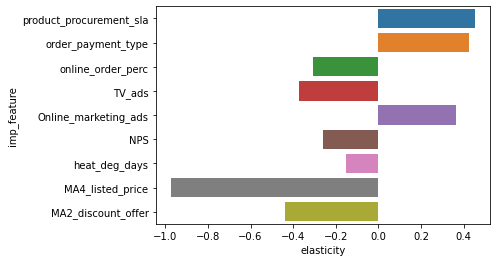

,imp_feature,coef,elasticity
0,product_procurement_sla,0.370,0.454
1,order_payment_type,0.801,0.424
2,online_order_perc,-0.402,-0.305
3,TV_ads,-0.454,-0.373
4,Online_marketing_ads,0.374,0.364
5,NPS,-0.327,-0.258
6,heat_deg_days,-0.150,-0.150
7,MA4_listed_price,-0.679,-0.974
8,MA2_discount_offer,-0.515,-0.440


In [127]:
elasticity(km1,camera_train_km)

Text(0, 0.5, 'y_pred')

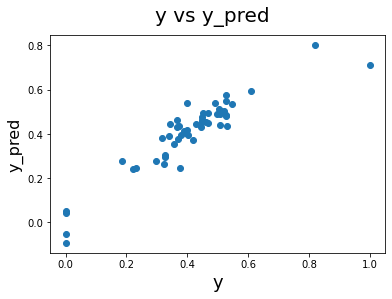

In [128]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

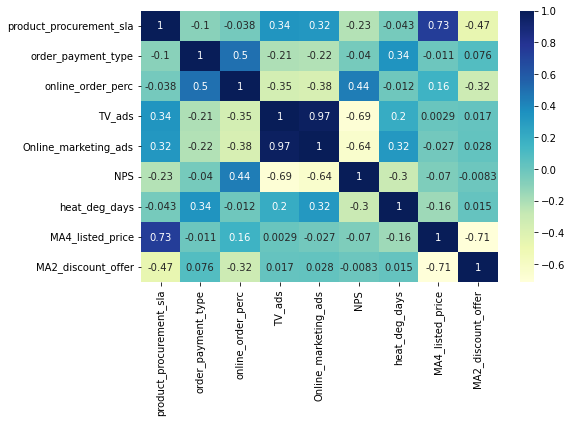

In [129]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_km[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### 4. Distributed Lag Model

In [130]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [131]:
camera_dlm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


camera_dlm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_NPS,lag_1_Stock_Index,lag_2_Stock_Index,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday
0,11151.000,0.491,2.423,2.731,26,100.000,0.054,1.854,0.000,0.332,...,54.600,1177.000,1177.000,1177.000,0.000,0.286,0.000,0.000,0.143,0.000
1,1228580.000,0.448,7.253,2.578,753,31.506,0.081,2.780,0.000,0.498,...,56.139,1177.000,1177.000,1185.286,0.286,0.000,0.000,0.143,0.000,0.143
2,1344416.000,0.458,6.567,2.577,823,32.023,0.081,2.780,0.000,0.498,...,59.987,1177.000,1185.286,1206.000,0.000,0.000,0.000,0.000,0.143,0.000
3,1346986.000,0.445,6.611,2.613,781,30.377,0.081,2.780,0.000,0.498,...,59.987,1185.286,1206.000,1206.000,0.000,0.000,0.286,0.143,0.000,0.143
4,913445.000,0.443,6.533,2.614,470,27.598,0.028,1.139,0.000,0.192,...,59.987,1206.000,1206.000,1206.000,0.000,0.286,0.429,0.000,0.143,0.000


In [132]:
camera_dlm['lag_1_gmv'] = camera_dlm['gmv'].shift(-1)
camera_dlm['lag_2_gmv'] = camera_dlm['gmv'].shift(-2)
camera_dlm['lag_3_gmv'] = camera_dlm['gmv'].shift(-3)

In [133]:
### Checking NaN

camera_dlm.isnull().sum()

gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
order_payment_type          0
online_order_perc           0
TV_ads                     18
Sponsorship_ads            18
Content_marketing_ads      18
Online_marketing_ads       18
NPS                         0
Stock_Index                 0
Special_sales               0
Payday                      0
heat_deg_days               0
cool_deg_days               0
total_rain_mm               0
total_snow_cm               0
snow_on_grnd_cm             0
MA4_listed_price            0
MA2_discount_offer          0
lag_1_listed_price          0
lag_1_discount              0
lag_2_discount              0
lag_3_discount              0
lag_2_NPS                   0
lag_3_NPS                   0
lag_1_Stock_Index           0
lag_2_Stock_Index           0
lag_3_Stock_Index           0
lag_1_Special_sales         0
lag_2_Special_sales         0
lag_3_Special_sales         0
lag_1_Payd

In [134]:
camera_dlm = camera_dlm.fillna(0)

In [135]:
camera_dlm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday,lag_1_gmv,lag_2_gmv,lag_3_gmv
0,11151.000,0.491,2.423,2.731,26,100.000,0.054,1.854,0.000,0.332,...,1177.000,0.000,0.286,0.000,0.000,0.143,0.000,1228580.000,1344416.000,1346986.000
1,1228580.000,0.448,7.253,2.578,753,31.506,0.081,2.780,0.000,0.498,...,1185.286,0.286,0.000,0.000,0.143,0.000,0.143,1344416.000,1346986.000,913445.000
2,1344416.000,0.458,6.567,2.577,823,32.023,0.081,2.780,0.000,0.498,...,1206.000,0.000,0.000,0.000,0.000,0.143,0.000,1346986.000,913445.000,1498.000
3,1346986.000,0.445,6.611,2.613,781,30.377,0.081,2.780,0.000,0.498,...,1206.000,0.000,0.000,0.286,0.143,0.000,0.143,913445.000,1498.000,299.000
4,913445.000,0.443,6.533,2.614,470,27.598,0.028,1.139,0.000,0.192,...,1206.000,0.000,0.286,0.429,0.000,0.143,0.000,1498.000,299.000,905.000


In [136]:
camera_dlm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

In [137]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
camera_dlm[varlist] = scaler.fit_transform(camera_dlm[varlist])

In [138]:
camera_dlm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday,lag_1_gmv,lag_2_gmv,lag_3_gmv
0,0.003,0.391,0.000,0.577,0.006,1.000,0.023,0.058,0.000,0.036,...,0.948,0.000,0.286,0.000,0.000,1.000,0.000,1228580.000,1344416.000,1346986.000
1,0.296,0.319,0.683,0.526,0.165,0.315,0.035,0.088,0.000,0.054,...,0.954,0.286,0.000,0.000,1.000,0.000,1.000,1344416.000,1346986.000,913445.000
2,0.324,0.335,0.586,0.526,0.180,0.320,0.035,0.088,0.000,0.054,...,0.971,0.000,0.000,0.000,0.000,1.000,0.000,1346986.000,913445.000,1498.000
3,0.325,0.314,0.592,0.538,0.171,0.304,0.035,0.088,0.000,0.054,...,0.971,0.000,0.000,0.286,1.000,0.000,1.000,913445.000,1498.000,299.000
4,0.220,0.311,0.581,0.538,0.103,0.276,0.012,0.036,0.000,0.021,...,0.971,0.000,0.286,0.429,0.000,1.000,0.000,1498.000,299.000,905.000


In [139]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_dlm.drop('gmv',axis=1)
y = camera_dlm['gmv']

camera_train_dlm = camera_dlm

In [140]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 38) (52,)


In [141]:
###  Instantiate
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)

LinearRegression()

In [142]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

,0,Coefficient
0,discount,2.182
1,sla,0.826
2,product_procurement_sla,1.246
3,order_payment_type,0.526
4,online_order_perc,-0.013
5,TV_ads,-1.141
6,Sponsorship_ads,-0.039
7,Content_marketing_ads,0.094
8,Online_marketing_ads,0.824
9,NPS,-0.828


In [143]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [144]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [145]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [146]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Drop total_snow_cm                  with p-value 0.999835
Drop Sponsorship_ads                with p-value 0.95253
Drop lag_3_Payday                   with p-value 0.933752
Drop lag_2_Special_sales            with p-value 0.885367
Drop lag_3_discount                 with p-value 0.881567
Drop lag_1_Stock_Index              with p-value 0.866053
Drop total_rain_mm                  with p-value 0.837248
Drop lag_3_Special_sales            with p-value 0.647191
Drop lag_1_Special_sales            with p-value 0.734045
Drop lag_2_Stock_Index              with p-value 0.624916
Drop lag_2_NPS                      with p-value 0.648005
Drop Stock_Index                    with p-value 0.634918
Drop Content_marketing_ads          with p-value 0.510651
Drop MA4_listed_price               with p-value 0.470777
Drop heat_deg_days                  with p-value 0.41477
Drop snow_on_grnd_cm                with p-value 0.48462
Drop cool_deg_days                  with p-value 0.386554
Drop sla         

In [147]:
###  Import statsmodels
import statsmodels.api as sm  

###  Subsetting training data for 15 selected columns
x_rfe1 = x[final_features]

x_rfe1 = sm.add_constant(x_rfe1)

###  Fitting the model with selected variables
dlm1 = sm.OLS(y, x_rfe1).fit() 

print(dlm1.params)

const                     -0.253
discount                   1.315
product_procurement_sla    0.755
order_payment_type         0.716
online_order_perc         -0.478
TV_ads                    -0.435
Online_marketing_ads       0.333
NPS                       -0.219
Special_sales              0.124
Payday                     0.148
MA2_discount_offer        -1.047
lag_1_listed_price         0.383
lag_1_discount            -0.236
lag_2_discount            -0.269
lag_1_Payday               0.209
lag_2_Payday               0.129
dtype: float64


In [148]:
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     24.19
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.27e-14
Time:                        09:44:46   Log-Likelihood:                 79.653
No. Observations:                  52   AIC:                            -127.3
Df Residuals:                      36   BIC:                            -96.09
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [149]:
###  Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,373.840
5,TV_ads,23.630
6,Online_marketing_ads,19.320
1,discount,15.780
14,lag_1_Payday,9.470
10,MA2_discount_offer,7.790
2,product_procurement_sla,6.300
15,lag_2_Payday,4.790
9,Payday,4.750
7,NPS,4.120


In [150]:
x_rfe1.drop('discount', axis = 1, inplace = True)

## 2

In [151]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     15.31
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           2.53e-11
Time:                        09:44:46   Log-Likelihood:                 66.938
No. Observations:                  52   AIC:                            -103.9
Df Residuals:                      37   BIC:                            -74.61
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [152]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,109.050
4,TV_ads,23.040
5,Online_marketing_ads,18.260
13,lag_1_Payday,8.330
8,Payday,4.620
14,lag_2_Payday,4.240
6,NPS,3.610
3,online_order_perc,2.910
12,lag_2_discount,2.350
2,order_payment_type,2.200


In [153]:
x_rfe1.drop('product_procurement_sla', axis = 1, inplace = True)

## 3

In [154]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     16.90
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           6.17e-12
Time:                        09:44:46   Log-Likelihood:                 66.887
No. Observations:                  52   AIC:                            -105.8
Df Residuals:                      38   BIC:                            -78.46
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4416 

In [155]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,70.860
3,TV_ads,22.790
4,Online_marketing_ads,18.260
12,lag_1_Payday,8.320
7,Payday,4.600
13,lag_2_Payday,4.210
5,NPS,3.590
2,online_order_perc,2.850
11,lag_2_discount,2.330
1,order_payment_type,2.190


In [156]:
x_rfe1.drop('lag_1_listed_price', axis = 1, inplace = True)

## 4

In [157]:
# Refitting with final selected variables
x_rfe1 = sm.add_constant(x_rfe1)

# Fitting the model with final selected variables
dlm1 = sm.OLS(y, x_rfe1).fit()   
print(dlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     17.71
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           3.51e-12
Time:                        09:44:46   Log-Likelihood:                 65.584
No. Observations:                  52   AIC:                            -105.2
Df Residuals:                      39   BIC:                            -79.80
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4903 

In [158]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = x_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_rfe1.values, i) for i in range(x_rfe1.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.530
3,TV_ads,20.970
4,Online_marketing_ads,17.910
11,lag_1_Payday,8.300
7,Payday,4.600
12,lag_2_Payday,4.210
5,NPS,3.440
2,online_order_perc,2.840
1,order_payment_type,2.160
10,lag_2_discount,1.810


In [159]:
features = list(x_rfe1.columns)
features.remove('const')
features

['order_payment_type',
 'online_order_perc',
 'TV_ads',
 'Online_marketing_ads',
 'NPS',
 'Special_sales',
 'Payday',
 'MA2_discount_offer',
 'lag_1_discount',
 'lag_2_discount',
 'lag_1_Payday',
 'lag_2_Payday']

In [160]:
###  Model Evaluation on testing data
x_2 = x[features]

###  Predicition with selected features on the test data
y_pred = dlm1.predict(sm.add_constant(x_2))

In [161]:
###  Mean square error (MSE)
mse = np.mean((y_pred - y)**2)
mse

0.00469935171678087

In [162]:
###  Coefficient values

coef = pd.DataFrame(x_rfe1.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

,0,Coefficient
0,const,2.182
1,order_payment_type,0.826
2,online_order_perc,1.246
3,TV_ads,0.526
4,Online_marketing_ads,-0.013
5,NPS,-1.141
6,Special_sales,-0.039
7,Payday,0.094
8,MA2_discount_offer,0.824
9,lag_1_discount,-0.828


In [163]:
###  Using K-Fold Cross validation evaluating on whole dataset

# lm = LinearRegression()
fold = KFold(10,shuffle = True, random_state = 100)

cv_scores = -cross_val_score(dlm,x[features],y,cv=fold,scoring='neg_mean_squared_error')

print("Neg. of MSE:",cv_scores,"\n")
print("Mean of 5 KFold CV - MSE:",cv_scores.mean())

Neg. of MSE: [0.03806837 0.01373383 0.00937807 0.01074972 0.00220461 0.00209162
 0.00156936 0.0366052  0.00278225 0.00508805] 

Mean of 5 KFold CV - MSE: 0.012227108921551957


In [164]:
def elasticity(model,x):
    
    features_df = pd.DataFrame(model.params)
    features_df = features_df.rename(columns={0:'coef'})
    
    features_df['imp_feature'] = model.params.index
    features_df = features_df[features_df.imp_feature != 'const'][['imp_feature','coef']]
    features_df.index = range(len(features_df))
#      features

    elasticity_list = list()
    
    for i in range(len(features_df)):
        elasticity_list.append(((features_df.coef[i] * np.mean(x[features_df.imp_feature[i]])) / np.mean(x['gmv'])))

    features_df['elasticity'] = np.round(elasticity_list,3)
    
    sns.barplot(x='elasticity',y='imp_feature',data=features_df)
    plt.show()
    
    return features_df

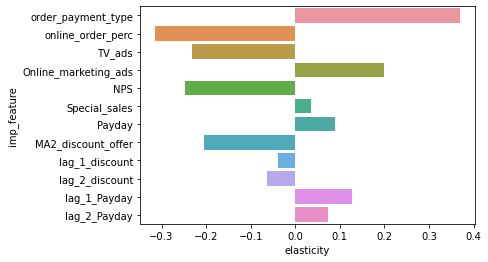

,imp_feature,coef,elasticity
0,order_payment_type,0.697,0.369
1,online_order_perc,-0.415,-0.314
2,TV_ads,-0.283,-0.232
3,Online_marketing_ads,0.204,0.199
4,NPS,-0.314,-0.248
5,Special_sales,0.122,0.036
6,Payday,0.109,0.090
7,MA2_discount_offer,-0.240,-0.205
8,lag_1_discount,-0.026,-0.038
9,lag_2_discount,-0.044,-0.064


In [165]:
elasticity(dlm1,camera_train_dlm)

Text(0, 0.5, 'y_pred')

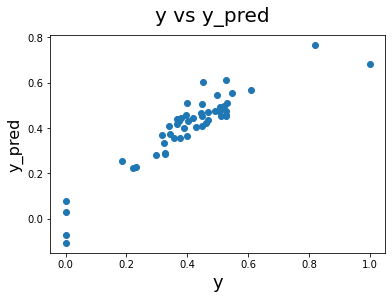

In [166]:
# Plotting y and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y, y_pred)
fig.suptitle('y vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

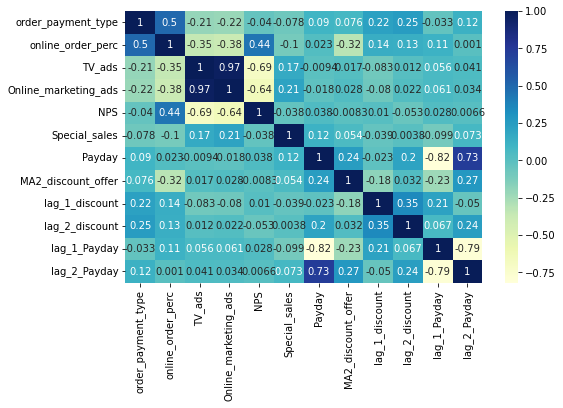

In [167]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(camera_train_dlm[features].corr(), cmap="YlGnBu", annot=True)
plt.show()

### 5. Distributed Lag + Multiplicative Model

In [168]:
ca_week.columns

Index(['week', 'gmv', 'listing_price', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', 'fsn_id', 'order_payment_type',
       'premium_product', 'online_order_perc', 'Date', 'Year', 'Month',
       'TV_ads', 'Sponsorship_ads', 'Content_marketing_ads',
       'Online_marketing_ads', 'NPS', 'Stock_Index', 'Special_sales', 'Payday',
       'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 'total_snow_cm',
       'snow_on_grnd_cm', 'MA4_listed_price', 'MA2_discount_offer',
       'lag_1_listed_price', 'lag_2_listed_price', 'lag_3_listed_price',
       'lag_1_discount', 'lag_2_discount', 'lag_3_discount',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_NPS',
       'lag_2_NPS', 'lag_3_NPS'],
      dtype='object')

In [169]:
camera_dlmm = ca_week[['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']]           


camera_dlmm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_NPS,lag_1_Stock_Index,lag_2_Stock_Index,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday
0,11151.000,0.491,2.423,2.731,26,100.000,0.054,1.854,0.000,0.332,...,54.600,1177.000,1177.000,1177.000,0.000,0.286,0.000,0.000,0.143,0.000
1,1228580.000,0.448,7.253,2.578,753,31.506,0.081,2.780,0.000,0.498,...,56.139,1177.000,1177.000,1185.286,0.286,0.000,0.000,0.143,0.000,0.143
2,1344416.000,0.458,6.567,2.577,823,32.023,0.081,2.780,0.000,0.498,...,59.987,1177.000,1185.286,1206.000,0.000,0.000,0.000,0.000,0.143,0.000
3,1346986.000,0.445,6.611,2.613,781,30.377,0.081,2.780,0.000,0.498,...,59.987,1185.286,1206.000,1206.000,0.000,0.000,0.286,0.143,0.000,0.143
4,913445.000,0.443,6.533,2.614,470,27.598,0.028,1.139,0.000,0.192,...,59.987,1206.000,1206.000,1206.000,0.000,0.286,0.429,0.000,0.143,0.000


In [170]:
camera_dlmm['lag_1_gmv'] = camera_dlmm['gmv'].shift(-1)
camera_dlmm['lag_2_gmv'] = camera_dlmm['gmv'].shift(-2)
camera_dlmm['lag_3_gmv'] = camera_dlmm['gmv'].shift(-3)

In [171]:
### Checking NaN

camera_dlmm.isnull().sum()

gmv                         0
discount                    0
sla                         0
product_procurement_sla     0
order_payment_type          0
online_order_perc           0
TV_ads                     18
Sponsorship_ads            18
Content_marketing_ads      18
Online_marketing_ads       18
NPS                         0
Stock_Index                 0
Special_sales               0
Payday                      0
heat_deg_days               0
cool_deg_days               0
total_rain_mm               0
total_snow_cm               0
snow_on_grnd_cm             0
MA4_listed_price            0
MA2_discount_offer          0
lag_1_listed_price          0
lag_1_discount              0
lag_2_discount              0
lag_3_discount              0
lag_2_NPS                   0
lag_3_NPS                   0
lag_1_Stock_Index           0
lag_2_Stock_Index           0
lag_3_Stock_Index           0
lag_1_Special_sales         0
lag_2_Special_sales         0
lag_3_Special_sales         0
lag_1_Payd

In [172]:
camera_dlmm = camera_dlmm.fillna(0)

In [173]:
### Applying Log 
camera_dlmm=np.log(camera_dlmm)

camera_dlmm = camera_dlmm.fillna(0)
camera_dlmm = camera_dlmm.replace([np.inf, -np.inf], 0)

In [174]:
camera_dlmm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday,lag_1_gmv,lag_2_gmv,lag_3_gmv
0,9.319,-0.712,0.885,1.005,3.258,4.605,-2.922,0.617,-8.364,-1.103,...,7.071,0.000,-1.253,0.000,0.000,-1.946,0.000,14.021,14.111,14.113
1,14.021,-0.803,1.981,0.947,6.624,3.450,-2.516,1.023,-7.958,-0.698,...,7.078,-1.253,0.000,0.000,-1.946,0.000,-1.946,14.111,14.113,13.725
2,14.111,-0.782,1.882,0.947,6.713,3.466,-2.516,1.023,-7.958,-0.698,...,7.095,0.000,0.000,0.000,0.000,-1.946,0.000,14.113,13.725,7.312
3,14.113,-0.810,1.889,0.961,6.661,3.414,-2.516,1.023,-7.958,-0.698,...,7.095,0.000,0.000,-1.253,-1.946,0.000,-1.946,13.725,7.312,5.700
4,13.725,-0.813,1.877,0.961,6.153,3.318,-3.568,0.131,-9.046,-1.652,...,7.095,0.000,-1.253,-0.847,0.000,-1.946,0.000,7.312,5.700,6.808


In [175]:
camera_dlmm.columns

Index(['gmv', 'discount', 'sla', 'product_procurement_sla',
       'order_payment_type', 'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

In [176]:
###  Import the StandardScaler()
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

###  Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()


###  Create a list of the variables that you need to scale
varlist = ['gmv', 'discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday']


###  Scale these variables using 'fit_transform'
camera_dlmm[varlist] = scaler.fit_transform(camera_dlmm[varlist])

In [177]:
camera_dlmm.head()

,gmv,discount,sla,product_procurement_sla,order_payment_type,online_order_perc,TV_ads,Sponsorship_ads,Content_marketing_ads,Online_marketing_ads,...,lag_3_Stock_Index,lag_1_Special_sales,lag_2_Special_sales,lag_3_Special_sales,lag_1_Payday,lag_2_Payday,lag_3_Payday,lag_1_gmv,lag_2_gmv,lag_3_gmv
0,0.379,0.536,0.000,0.725,0.387,1.000,0.470,0.382,0.358,0.393,...,0.992,1.000,0.356,1.000,1.000,0.000,1.000,14.021,14.111,14.113
1,0.873,0.459,0.802,0.683,0.786,0.749,0.527,0.471,0.388,0.467,...,0.993,0.356,1.000,1.000,0.000,1.000,0.000,14.111,14.113,13.725
2,0.882,0.477,0.730,0.683,0.796,0.753,0.527,0.471,0.388,0.467,...,0.996,1.000,1.000,1.000,1.000,0.000,1.000,14.113,13.725,7.312
3,0.882,0.454,0.735,0.693,0.790,0.741,0.527,0.471,0.388,0.467,...,0.996,1.000,1.000,0.356,0.000,1.000,0.000,13.725,7.312,5.700
4,0.841,0.450,0.726,0.693,0.730,0.720,0.378,0.277,0.307,0.293,...,0.996,1.000,0.356,0.565,1.000,0.000,1.000,7.312,5.700,6.808


In [178]:
###  Split the train dataset into X and y
from sklearn.model_selection import train_test_split
x = camera_dlmm.drop('gmv',axis=1)
y = camera_dlmm['gmv']

camera_train_dlmm = camera_dlmm

In [179]:
print("X = Independent variable & Y = Target variable")
print(x.shape,y.shape)

X = Independent variable & Y = Target variable
(52, 38) (52,)


In [180]:
###  Instantiate
dlm = LinearRegression()

###  Fit a line
dlm.fit(x,y)

LinearRegression()

In [181]:
###  Coefficient values

coef = pd.DataFrame(x.columns)
coef['Coefficient'] = pd.Series(dlm.coef_)
coef

,0,Coefficient
0,discount,0.031
1,sla,0.168
2,product_procurement_sla,0.282
3,order_payment_type,0.714
4,online_order_perc,-0.283
5,TV_ads,0.129
6,Sponsorship_ads,0.011
7,Content_marketing_ads,-0.044
8,Online_marketing_ads,-0.037
9,NPS,-0.057


In [182]:
col = x.columns
col

Index(['discount', 'sla', 'product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads', 'Sponsorship_ads',
       'Content_marketing_ads', 'Online_marketing_ads', 'NPS', 'Stock_Index',
       'Special_sales', 'Payday', 'heat_deg_days', 'cool_deg_days',
       'total_rain_mm', 'total_snow_cm', 'snow_on_grnd_cm', 'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price', 'lag_1_discount',
       'lag_2_discount', 'lag_3_discount', 'lag_2_NPS', 'lag_3_NPS',
       'lag_1_Stock_Index', 'lag_2_Stock_Index', 'lag_3_Stock_Index',
       'lag_1_Special_sales', 'lag_2_Special_sales', 'lag_3_Special_sales',
       'lag_1_Payday', 'lag_2_Payday', 'lag_3_Payday', 'lag_1_gmv',
       'lag_2_gmv', 'lag_3_gmv'],
      dtype='object')

### Model Building - Stepwise selection for feature selection

In [183]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [184]:
def stepwise_selection(x, y,
                       initial_list=['discount', 'sla','product_procurement_sla', 'order_payment_type',
       'online_order_perc', 'TV_ads','Sponsorship_ads', 'Content_marketing_ads', 'Online_marketing_ads',
       'NPS', 'Stock_Index', 'Special_sales', 'Payday','heat_deg_days', 'cool_deg_days', 
       'total_rain_mm', 'total_snow_cm','snow_on_grnd_cm',  'MA4_listed_price',
       'MA2_discount_offer', 'lag_1_listed_price','lag_1_discount',
       'lag_2_discount','lag_3_discount','lag_2_NPS','lag_3_NPS','lag_1_Stock_Index',
       'lag_2_Stock_Index','lag_3_Stock_Index','lag_1_Special_sales','lag_2_Special_sales','lag_3_Special_sales',
       'lag_1_Payday','lag_2_Payday','lag_3_Payday'],
                     threshold_in=0.01,threshold_out = 0.05, verbose=True):
    
    included = list(initial_list)
    while True:
        changed=False
        ###  forward step
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                
                
        ###  backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        ###  use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() ###  null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [185]:
import statsmodels.api as sm  

final_features = stepwise_selection(x, y)

print("\n","final_selected_features:",final_features)

Add                               1 with p-value 0.00143211


KeyError: '[1] not in index'

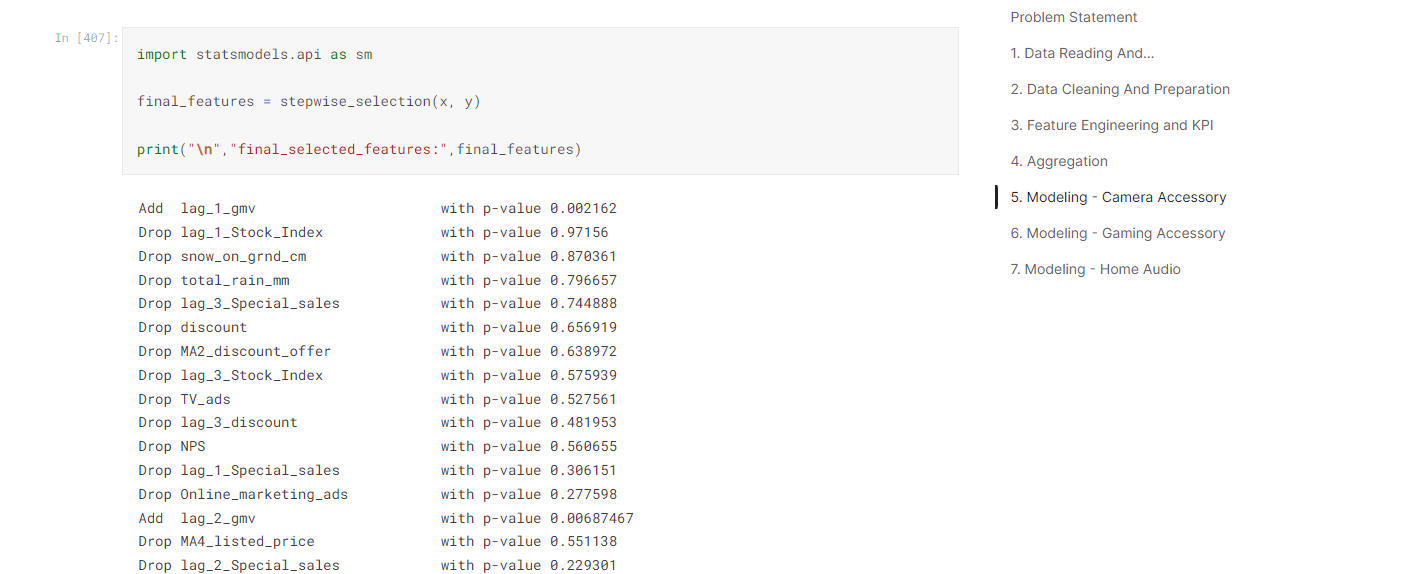

In [186]:
# https://www.kaggle.com/goyalshalini93/market-mix-model-eleckart/notebook